D:\applicationShit\Anaconda\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


(11368, 100)
PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


D:\applicationShit\Anaconda\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


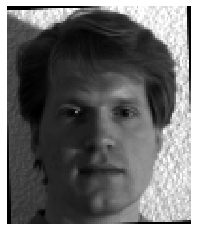

[[-25.20315672]
 [-15.61719518]
 [ -5.48692552]
 ...
 [-24.56726515]
 [-15.20090241]
 [-20.26176723]]
res01.png


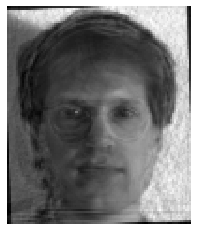

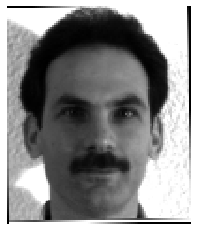

[[ -6.08354089]
 [-11.23875159]
 [ -0.93968491]
 ...
 [ -4.89516261]
 [ 17.42732539]
 [ -2.88461697]]
res02.png


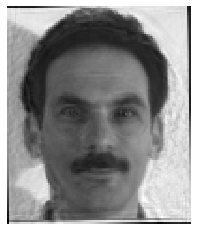

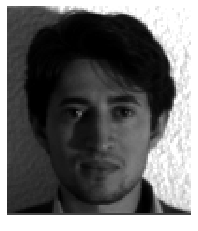

[[130.55555796]
 [106.06151798]
 [112.47169834]
 ...
 [240.14264619]
 [264.4017773 ]
 [248.62260231]]
res03.png


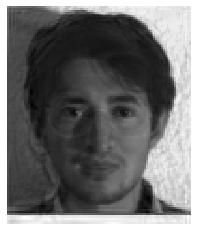

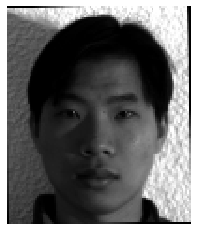

[[ -1.63231927]
 [ -8.58756677]
 [-17.28528362]
 ...
 [-10.31480343]
 [ -8.08045763]
 [  1.29107117]]
res04.png


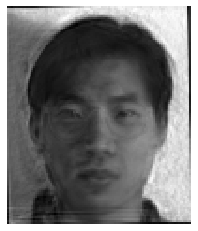

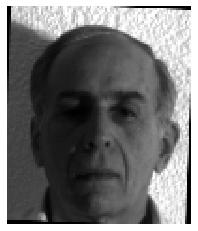

[[ -6.4265644 ]
 [ 12.76585998]
 [146.21256228]
 ...
 [ 71.52166648]
 [  4.12050262]
 [  8.62561535]]
res05.png


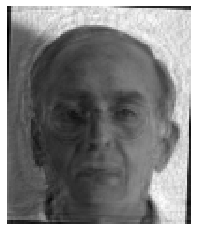

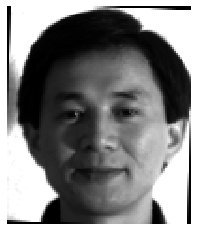

[[ -3.30057928]
 [  8.64530337]
 [244.08626608]
 ...
 [240.77363145]
 [  4.0005866 ]
 [  0.51511737]]
res06.png


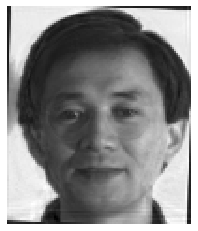

In [2]:
import numpy as np
from scipy import misc                     # for loading image
import matplotlib.pyplot as plt
np.random.seed(1)

# filename structure
path = 'D:/Download Section/IDM/Compressed/YALE/YALE/unpadded/' # path to the database
ids = range(1, 16) # 15 persons
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight','sad',
          'sleepy', 'surprised', 'wink' ] # array containing labels
prefix = 'subject' # literally prefix string
surfix = '.pgm' # literally suffix string

# data dimension
h = 116 # hight
w = 98 # width
D = h * w # area of the picture
N = len(states)*15 # 
K = 100 # number of features will be taken

# collect all data
X = np.zeros((D, N)) # creating a "feature" array
cnt = 0 # 
for person_id in range(1, 16): # 
    for state in states:
        fn = path  + prefix + str(person_id).zfill(2) + '.' + state + surfix 
        # eg: D:/Download Section/IDM/Compressed/YALE/YALE/unpadded/subject/centerlight00.pgm (why creates a path?)
        X[:, cnt] = misc.imread(fn).reshape(D) # changing 2-dimension matrix to 1-dimension matrix
        cnt += 1

# Doing PCA, note that each row is a datapoint
from sklearn.decomposition import PCA # importing PCA from sklearn library
pca = PCA(n_components=K) # K = 100, also PCA-ing the data array
pca.fit(X.T) # finding best fits (google search results say it)

# projection matrix
U = pca.components_.T # creating the feature-filled array [[feature1]; [feature2]; [featureN]]
print(U.shape)
print(pca)

# See reconstruction of first 6 persons 
for person_id in range(1, 7): # just looping
    for state in ['rightlight']: # picking the array of picture to output (?)
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix #probably taking out the path where the picture resided
        im = misc.imread(fn) # taking the picture and putting it in a variable (?)
        plt.axis('off') # turning off the axis to show the picture
#         plt.imshow(im, interpolation='nearest' )
        f1 = plt.imshow(im, interpolation='nearest') # showing image on a graph
        f1.axes.get_xaxis().set_visible(False) # turning off the x-axis for that image graph
        f1.axes.get_yaxis().set_visible(False) # turning off the y-axis for that image graph
        plt.gray() # grayscaling the colormap (google search result says so)
        fn = 'ori' + str(person_id).zfill(2) + '.png' # setting a path for a displayable picture directory
        plt.savefig(fn, bbox_inches='tight', pad_inches=0) # save it in the fn directory
        plt.show() # show the original image (or colormap)
        # reshape and subtract mean, don't forget 
        x = im.reshape(D, 1) - pca.mean_.reshape(D, 1) # subtracting the X0 from X = X0 + a1*X1 + a2*X2... to get the one without X0
        # encode
        z = U.T.dot(x)
        #decode
        x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)
        print(x_tilde)
        # reshape to orginal dim
        im_tilde = x_tilde.reshape(116, 98)
       
        plt.axis('off')
#         plt.imshow(im_tilde, interpolation='nearest' )
        f1 = plt.imshow(im_tilde, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False) # setting unnecessary stuff off
        plt.gray() # grayscale the image
        fn = 'res' + str(person_id).zfill(2) + '.png' # just string to log
        print(fn) # logging 
        plt.savefig(fn, bbox_inches='tight', pad_inches=0) # saving image i guess (?)
        plt.show() # showning the image

[-0.00567944  0.00160556 -0.00450324  0.0122559  -0.0087215  -0.02283504
  0.01533669  0.04182369  0.02282742 -0.0001133   0.02702335 -0.03349946
 -0.02649862 -0.01256968 -0.01328626 -0.04129626 -0.00255617 -0.00168143
  0.02447445 -0.01951406 -0.0199744   0.00071448 -0.0062915  -0.00299762
 -0.01153069 -0.02373793  0.02957937  0.0050179  -0.02912955 -0.02160422]


SyntaxError: invalid syntax (<ipython-input-40-b3fd725e53b2>, line 2)